# Demonstration week 2 - Data Visualization (basics)

Import the necessary packages. We work primarily with pandas, but we will use seborn for plotting where possible. As Seaborn and the pandas plotting facilities depend on matplotlib, we inport matplotlib's interactive plotting API (pyplot) as well. In addition we set Seaborn's appearance defaults as our Notebook defaults.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set() # use seaborn default settings

C:\Users\super\AppData\Local\Temp\ipykernel_20836\3584469196.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Read the data. The csv is semicolon separated and we have to do some transformations on the date field which is in Dutch format as well.

In [2]:
df = pd.read_csv('sales.csv', sep=';', decimal=',', skiprows=17, parse_dates=[1], dayfirst=True)

## Data Understanding

Show some default information about the loaded dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   orderno     530 non-null    int64         
 1   orderdate   530 non-null    datetime64[ns]
 2   empno       530 non-null    int64         
 3   name        530 non-null    object        
 4   custno      530 non-null    int64         
 5   city        530 non-null    object        
 6   regioncode  530 non-null    object        
 7   prodno      530 non-null    int64         
 8   proddesc    530 non-null    object        
 9   catdesc     530 non-null    object        
 10  quantity    530 non-null    int64         
 11  linetotal   530 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 49.8+ KB


There are no nulls in this dataset, but this is what we could do to make the nulls explicit.

In [4]:
df.isna().sum()

orderno       0
orderdate     0
empno         0
name          0
custno        0
city          0
regioncode    0
prodno        0
proddesc      0
catdesc       0
quantity      0
linetotal     0
dtype: int64

In [5]:
df

,orderno,orderdate,empno,name,custno,city,regioncode,prodno,proddesc,catdesc,quantity,linetotal
0,1001,2017-01-06,805,Harrie,15,Veghel,GVGH,408,Fruit Yogurt Mango,Dairy Products,9,146.25
1,1004,2017-01-14,806,Karel,19,Veghel,GVGH,406,Foie Gras,Luxury Products,7,52.50
2,1014,2017-01-27,806,Karel,19,Veghel,GVGH,401,Organic Soymilk Sweetened,Organic Products,22,473.00
3,1014,2017-01-27,806,Karel,19,Veghel,GVGH,405,Sweetbread,Luxury Products,9,80.55
4,1014,2017-01-27,806,Karel,19,Veghel,GVGH,409,Low-Fat Quark,Dairy Products,23,373.75
...,...,...,...,...,...,...,...,...,...,...,...,...
525,1429,2019-12-08,802,Klaas,18,Laarbeek,RHMD,408,Fruit Yogurt Mango,Dairy Products,14,245.00
526,1431,2019-12-11,803,Gerda,18,Laarbeek,RHMD,407,Caviar,Luxury Products,22,284.90
527,1432,2019-12-15,805,Harrie,18,Laarbeek,RHMD,401,Organic Soymilk Sweetened,Organic Products,6,129.00
528,1432,2019-12-15,805,Harrie,18,Laarbeek,RHMD,407,Caviar,Luxury Products,28,362.60


Describe gives some basic statistical information on all numeric variables in the dataset. Note that the identifiers (orderno, empno, custno, prodno) are merely labels (identifiers) and not really numbers.

In [6]:
df.describe()

,orderno,orderdate,empno,custno,prodno,quantity,linetotal
count,530.000000,530,530.000000,530.000000,530.000000,530.000000,530.000000
mean,1219.535849,2018-06-07 14:32:09.056603648,803.498113,15.288679,406.092453,13.649057,239.306509
min,1001.000000,2017-01-06 00:00:00,801.000000,11.000000,401.000000,2.000000,17.900000
25%,1108.250000,2017-09-24 00:00:00,802.000000,13.000000,403.000000,8.000000,127.875000
50%,1219.500000,2018-06-18 12:00:00,803.000000,15.000000,406.000000,13.000000,195.250000
75%,1333.750000,2019-03-15 00:00:00,805.000000,18.000000,409.000000,19.000000,332.500000
max,1439.000000,2019-12-26 00:00:00,806.000000,20.000000,411.000000,32.000000,918.850000
std,128.392650,NaN,1.713120,2.796444,3.212826,6.211266,157.113719


Convert the identifiers to strings.

In [7]:
df[['orderno', 'empno', 'custno', 'prodno']] = df[['orderno', 'empno', 'custno', 'prodno']].astype(str)

In [8]:
df

,orderno,orderdate,empno,name,custno,city,regioncode,prodno,proddesc,catdesc,quantity,linetotal
0,1001,2017-01-06,805,Harrie,15,Veghel,GVGH,408,Fruit Yogurt Mango,Dairy Products,9,146.25
1,1004,2017-01-14,806,Karel,19,Veghel,GVGH,406,Foie Gras,Luxury Products,7,52.50
2,1014,2017-01-27,806,Karel,19,Veghel,GVGH,401,Organic Soymilk Sweetened,Organic Products,22,473.00
3,1014,2017-01-27,806,Karel,19,Veghel,GVGH,405,Sweetbread,Luxury Products,9,80.55
4,1014,2017-01-27,806,Karel,19,Veghel,GVGH,409,Low-Fat Quark,Dairy Products,23,373.75
...,...,...,...,...,...,...,...,...,...,...,...,...
525,1429,2019-12-08,802,Klaas,18,Laarbeek,RHMD,408,Fruit Yogurt Mango,Dairy Products,14,245.00
526,1431,2019-12-11,803,Gerda,18,Laarbeek,RHMD,407,Caviar,Luxury Products,22,284.90
527,1432,2019-12-15,805,Harrie,18,Laarbeek,RHMD,401,Organic Soymilk Sweetened,Organic Products,6,129.00
528,1432,2019-12-15,805,Harrie,18,Laarbeek,RHMD,407,Caviar,Luxury Products,28,362.60


In [9]:
df.describe()

,orderdate,quantity,linetotal
count,530,530.000000,530.000000
mean,2018-06-07 14:32:09.056603648,13.649057,239.306509
min,2017-01-06 00:00:00,2.000000,17.900000
25%,2017-09-24 00:00:00,8.000000,127.875000
50%,2018-06-18 12:00:00,13.000000,195.250000
75%,2019-03-15 00:00:00,19.000000,332.500000
max,2019-12-26 00:00:00,32.000000,918.850000
std,NaN,6.211266,157.113719


Since dates are in the end numerics as well, we can add them to the describe targets.
> dese was kapot dus heb ik hem uit gezet

In [11]:
#df.describe(datetime_is_numeric=True)

We can ask for a statistical summry for the categorical variables as well.

In [12]:
df.describe(include='O')

,orderno,empno,name,custno,city,regioncode,prodno,proddesc,catdesc
count,530,530,530,530,530,530,530,530,530
unique,439,6,6,10,6,3,11,11,3
top,1274,803,Gerda,14,Eindhoven,REHV,405,Sweetbread,Dairy Products
freq,6,105,105,63,159,196,56,56,190


How often does each level in the catgoricals appear in the dataset?

In [13]:
df[['orderno', 'prodno', 'proddesc']].value_counts()

orderno  prodno  proddesc                 
1187     410     Full Yogurt                  2
1001     408     Fruit Yogurt Mango           1
1289     407     Caviar                       1
1302     401     Organic Soymilk Sweetened    1
1301     401     Organic Soymilk Sweetened    1
                                             ..
1138     403     Organic Soymilk Chocolat     1
1137     402     Organic Soy Custard          1
1136     407     Caviar                       1
1135     404     Organic Soymilk              1
1439     407     Caviar                       1
Name: count, Length: 529, dtype: int64

The previous query returned a series with a multi level index, eventually leading to to row for each row in the dataset. But hold on, we're one short: 529 rows instead of the 530 in the original. That means that there is a duplication in the data that is not allowed, as each product can only occur once on the order. We can already see that there is a problem in order 1187.

How many times is each product ordered in an order? Note that this something else als the volume of ordered products. For that we have to sum the quantities sold.

In [ ]:
df.proddesc.value_counts()

Sweetbread                   56
Fruit Yogurt Strawberry      56
Full Yogurt                  54
Caviar                       54
Organic Soymilk Sweetened    51
Organic Soy Custard          50
Foie Gras                    50
Organic Soymilk              45
Low-Fat Quark                42
Fruit Yogurt Mango           38
Organic Soymilk Chocolat     34
Name: proddesc, dtype: int64

You can also show unique combinations of 2 columns using the unstack function.

In [ ]:
df[['proddesc', 'city']].value_counts().unstack()

city,Eindhoven,Erp,Helmond,Laarbeek,Veghel,Waalre
proddesc,,,,,,
Caviar,13,7,13,7,12,2
Foie Gras,13,9,9,3,12,4
Fruit Yogurt Mango,13,7,3,4,9,2
Fruit Yogurt Strawberry,22,5,8,8,8,5
Full Yogurt,21,4,11,3,12,3
Low-Fat Quark,9,5,10,4,10,4
Organic Soy Custard,13,5,12,6,10,4
Organic Soymilk,20,3,9,1,8,4
Organic Soymilk Chocolat,8,7,7,3,7,2


The following does not work:
- column name is not a parameter of sum. Functions in pandas are methods and not generic functions as in R
- the sum function is applied (vectorised) over all values in the axis (for which it makes sense to sum up). Here, the horizontal axes (columns), which is the default value

In [ ]:
# hmm, wrong result
df.groupby('proddesc').sum(['quantity'])

,quantity,linetotal
proddesc,,
Caviar,761,9854.95
Foie Gras,645,5061.00
Fruit Yogurt Mango,521,8880.50
Fruit Yogurt Strawberry,806,16427.70
Full Yogurt,738,16124.00
Low-Fat Quark,499,8108.75
Organic Soy Custard,622,23992.10
Organic Soymilk,655,7654.50
Organic Soymilk Chocolat,450,7610.50


If you want to apply the sum to a specific column (or: specific columns), you have to restrict the dataframe first.

In [ ]:
df.groupby('proddesc').quantity.sum()

proddesc
Caviar                       761
Foie Gras                    645
Fruit Yogurt Mango           521
Fruit Yogurt Strawberry      806
Full Yogurt                  738
Low-Fat Quark                499
Organic Soy Custard          622
Organic Soymilk              655
Organic Soymilk Chocolat     450
Organic Soymilk Sweetened    746
Sweetbread                   791
Name: quantity, dtype: int64

Or, equivalently:

In [ ]:
df.groupby('proddesc')['quantity'].sum()

proddesc
Caviar                       761
Foie Gras                    645
Fruit Yogurt Mango           521
Fruit Yogurt Strawberry      806
Full Yogurt                  738
Low-Fat Quark                499
Organic Soy Custard          622
Organic Soymilk              655
Organic Soymilk Chocolat     450
Organic Soymilk Sweetened    746
Sweetbread                   791
Name: quantity, dtype: int64

Note that our input data has rows on orderline level. Often we will find ourselves only interested in orders. To determine the order value, we have to sum the orderline values.

In [ ]:
df.groupby('orderno').linetotal.sum()

orderno
1001    146.25
1002    392.70
1003    387.00
1004     52.50
1005    142.50
         ...  
1435    131.70
1436    333.00
1437    239.35
1438    222.00
1439    142.45
Name: linetotal, Length: 439, dtype: float64

In [ ]:
df.groupby(['orderno', 'orderdate']).linetotal.sum()

orderno  orderdate 
1001     2017-01-06    146.25
1002     2017-01-07    392.70
1003     2017-01-08    387.00
1004     2017-01-14     52.50
1005     2017-01-19    142.50
                        ...  
1435     2019-12-17    131.70
1436     2019-12-17    333.00
1437     2019-12-22    239.35
1438     2019-12-26    222.00
1439     2019-12-26    142.45
Name: linetotal, Length: 439, dtype: float64

In [ ]:
df.groupby(['orderno', 'orderdate']).linetotal.sum().reset_index()

,orderno,orderdate,linetotal
0,1001,2017-01-06,146.25
1,1002,2017-01-07,392.70
2,1003,2017-01-08,387.00
3,1004,2017-01-14,52.50
4,1005,2017-01-19,142.50
...,...,...,...
434,1435,2019-12-17,131.70
435,1436,2019-12-17,333.00
436,1437,2019-12-22,239.35
437,1438,2019-12-26,222.00


Let's create a new dataset, derived from the original dataset, with rows on an order level instead of an order line level.

In [ ]:
orders = (df
 .groupby(['orderno', 'orderdate', 'empno', 'custno', 'city', 'regioncode'], as_index=False)
 .linetotal
 .sum()
 .rename(columns={'linetotal': 'ordval'})
)
orders

,orderno,orderdate,empno,custno,city,regioncode,ordval
0,1001,2017-01-06,805,15,Veghel,GVGH,146.25
1,1002,2017-01-07,805,16,Eindhoven,REHV,392.70
2,1003,2017-01-08,806,13,Helmond,RHMD,387.00
3,1004,2017-01-14,806,19,Veghel,GVGH,52.50
4,1005,2017-01-19,803,17,Helmond,RHMD,142.50
...,...,...,...,...,...,...,...
434,1435,2019-12-17,803,15,Veghel,GVGH,131.70
435,1436,2019-12-17,806,12,Eindhoven,REHV,333.00
436,1437,2019-12-22,804,12,Eindhoven,REHV,239.35
437,1438,2019-12-26,806,16,Eindhoven,REHV,222.00


What is for each customer the average value per order?

In [ ]:
(orders
 .groupby('custno')
 .ordval
 .mean()
)

custno
11    290.536735
12    267.151064
13    268.953846
14    284.843617
15    281.367045
16    267.407143
17    332.487838
18    293.526667
19    290.154255
20    341.639655
Name: ordval, dtype: float64

Let's make a plot of the average order value in each city. For now we'll use pandas' standard plotting facilities.

We end plot queries with a semicolon to avoid matplotlib's default output to be shown.

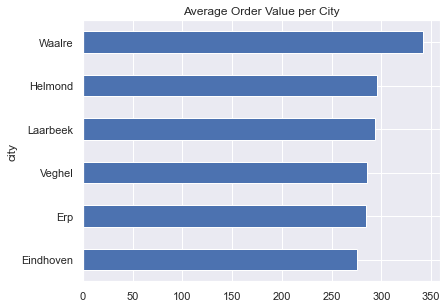

In [ ]:
plt.figure(figsize=(6.4, 4.8)) # default figure size with aspect ratio 3:4

(orders
 .groupby(['city'])     # group by city: will be index
 .ordval                # apply on ordval
 .mean()                # apply an the mean aggregation on ordval
 .sort_values()         # sort by the values of the series; ascending by default
 .plot(kind='barh', title='Average Order Value per City')
);

Show the distribution of ordervalues per city in a boxplot. Why does the plt figsize directive not seem to work? Moreover, why doesn't it plot with Seaborn settings. It seems that upon drawing the plot with Seaborn setting is overwritten with default pandas settings. Don;t know what I do wrong.

<Figure size 576x432 with 0 Axes>

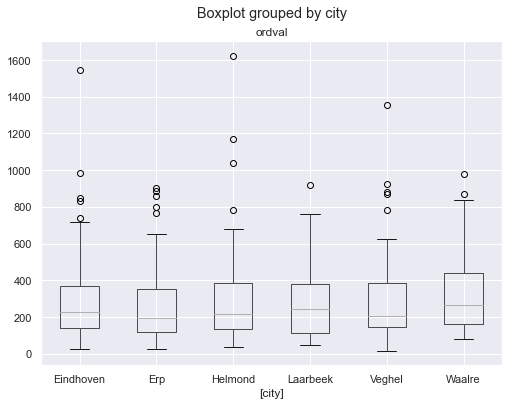

In [ ]:
plt.figure(figsize=(8, 6))

(orders[['city', 'ordval']]
 .boxplot(by='city', figsize=(8,6))
);

We get a better aesthetic appearance using Seaborn plotting. But setting the plot size is again different. (I still haven't really gooten the concept behind this; matplotlib, pandas plotting and Seaborn are all matplotlib based, but they seem to have their own private settings.)

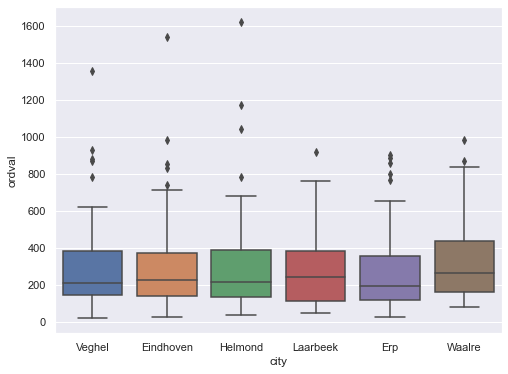

In [ ]:
sns.set(rc={"figure.figsize":(8, 6)})

sns.boxplot(x='city', y='ordval', data=orders);

We can also integrate the Seaborn plotting into a single, method chained query. Although conceptually completely different, this resembles the way of working in R/tidyverse.

<AxesSubplot:xlabel='city', ylabel='ordval'>

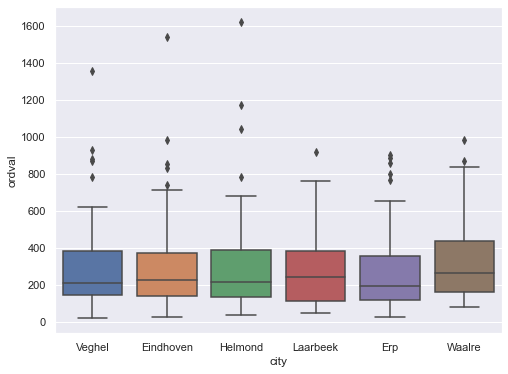

In [ ]:
(orders
 .pipe((sns.boxplot, 'data'), x='city', y='ordval')
)

For the distribution of product category values per order, we can't use the orders table and have to fall back on the original table. Note that the Seaborn boxplot collects all partial values per orders and shows a distribution of it.

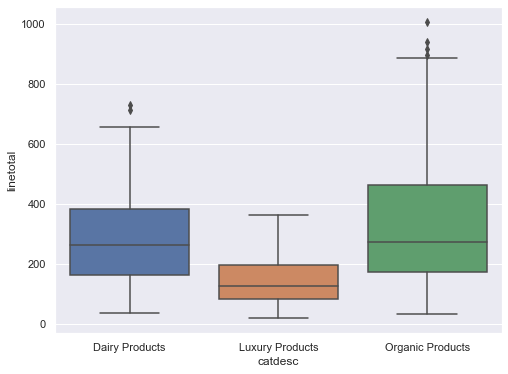

In [ ]:
(df
 .groupby(['orderno', 'catdesc'], as_index=False)
 .linetotal
 .sum()
 .pipe((sns.boxplot, 'data'), x='catdesc', y='linetotal')
);

We can add an additional category, but have to rely on a different methos to separate levels of that category. Here we use different facets for different levels of city.

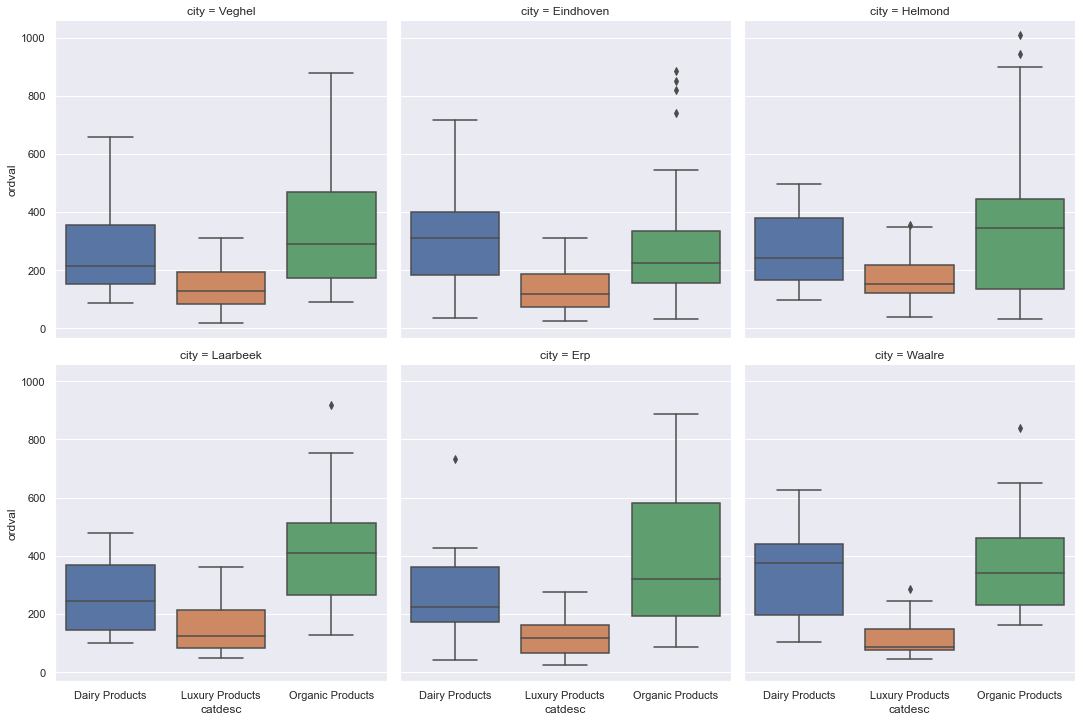

In [ ]:
(df
 .groupby(['orderno', 'city', 'catdesc'], as_index=False)
 .linetotal
 .sum()
 .rename(columns={'linetotal': 'ordval'})
 .pipe((sns.catplot, 'data'), x='catdesc', y='ordval', kind='box', col='city', col_wrap=3)
);

Plotting values in time is a very practical way to discover trends. We use a lineplot for that. But first we want to summarise individual dates to a higher level of aggregation. That's called resampling in pandas. Resampling functions work only with datetime indices. Here we use upsampling: sampling to a lower level of detail. Although used rarely you can also downsample, but you have to make up detail information for that.

Note that the reample() method returns a Resampler object which can be considered a time-based GroupBy object.

<AxesSubplot:xlabel='orderdate', ylabel='ordval'>

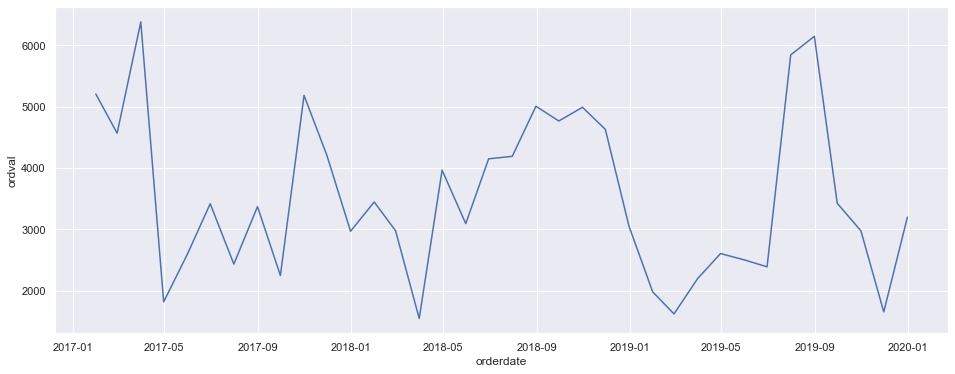

In [ ]:
plt.figure(figsize=(16, 6))

(orders
 .set_index('orderdate')
 .resample('M')
 .ordval
 .sum()
 .pipe((sns.lineplot, 'data'))
)

You can also resample timestamps in a more traditional way, that is without using a datetime index. We do this using a Grouper.

<AxesSubplot:xlabel='orderdate', ylabel='ordval'>

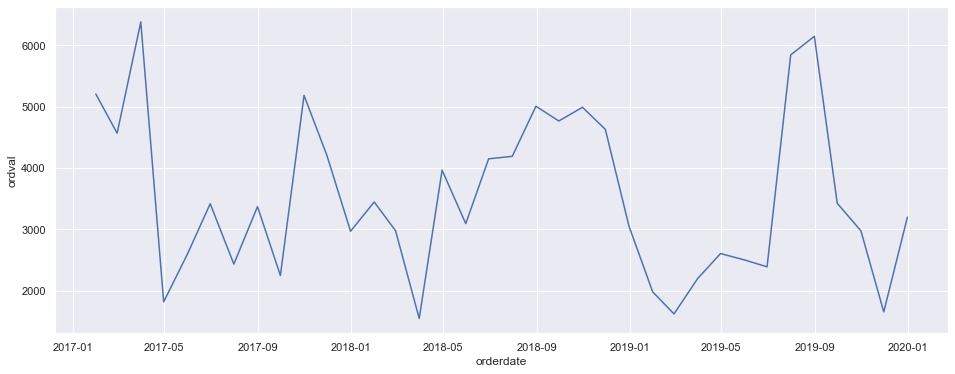

In [ ]:
plt.figure(figsize=(16, 6))

(orders
 .groupby(pd.Grouper(key='orderdate', freq='M'))
 .ordval
 .sum()
 .pipe((sns.lineplot, 'data'))
)

Another alternative is to use a specific datetime converter. Doing so has the advantage to be able to rename the upsampled time value.

In addition we split the trendline here in different lines for each region. We do so by unstacking the second level of the index into separate columns. THis can be regarded as a pivot_wider. (You can get to the same result using the pivot function.) The pandas plot automatically each column as a separate series.

Why are there gaps in the lines? Weren't there any sales in those periods? Why are the gaps closed in the forthcoming plots?

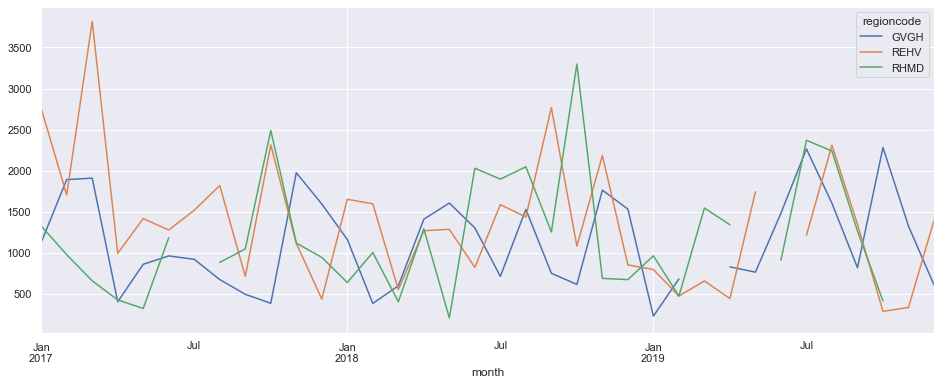

In [ ]:
(orders
 .groupby([orders.orderdate.dt.to_period('M').rename('month'), 'regioncode'])
 .ordval
 .sum()
 .unstack(level=1)
 .plot(legend=True, figsize=(16,6))
);

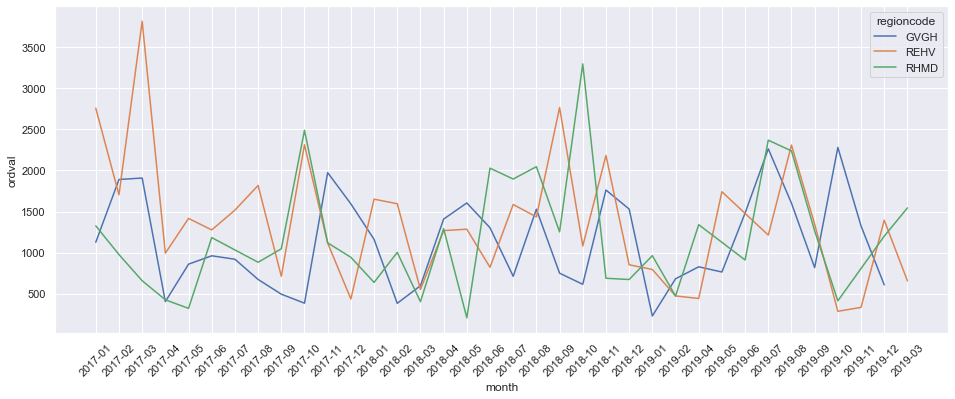

In [ ]:
# Seaborn does not seem to recognize pandas periods, which are numerics under the hood?
# really took a long time :-(

plt.figure(figsize=(16, 6))

(orders
 .assign(month=lambda x: x.orderdate.dt.to_period('M').astype(str))
 .groupby(['regioncode', 'month'], as_index=False)
 .ordval
 .sum()
 .pipe((sns.lineplot, 'data'), x='month', y='ordval', hue='regioncode')
)
plt.xticks(rotation=45);

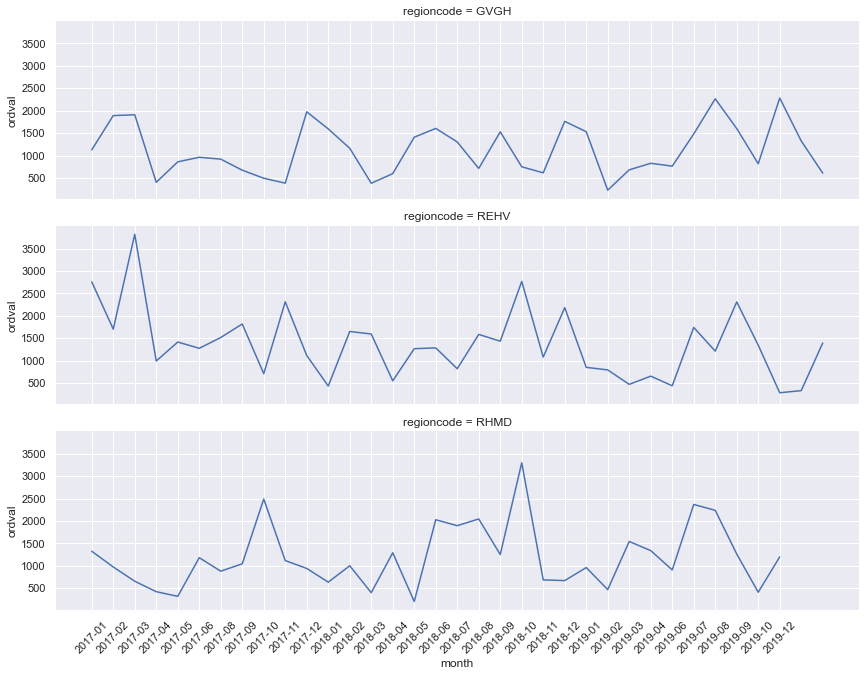

In [ ]:
(orders
 .assign(month=lambda x: x.orderdate.dt.to_period('M').astype(str))
 .groupby(['regioncode', 'month'], as_index=False)
 .ordval
 .sum()
 .pipe((sns.relplot, 'data'), kind='line', x='month', y='ordval', col='regioncode', col_wrap=1, height=3, aspect=4)
)
plt.xticks(rotation=45);

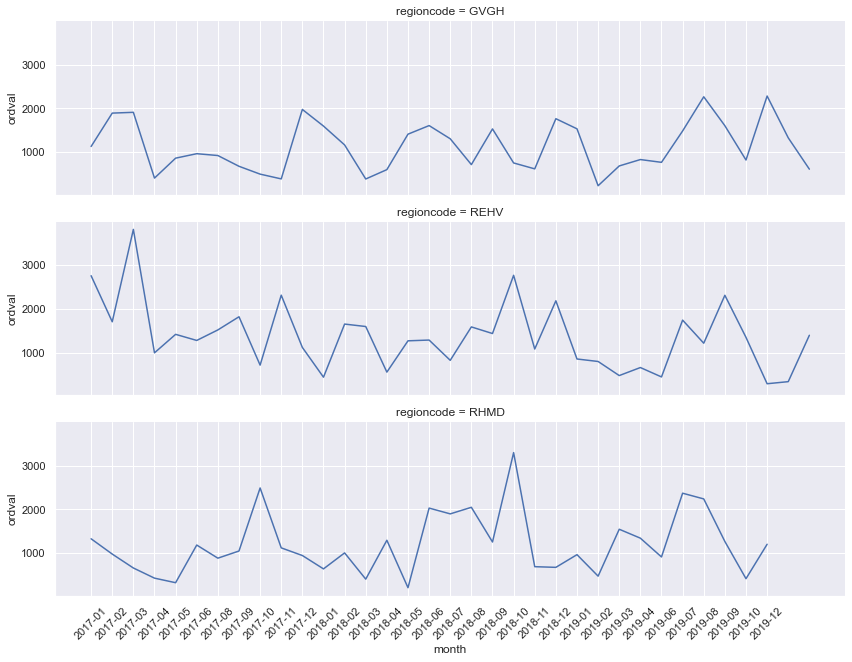

In [ ]:
g = (orders
 .assign(month=lambda x: x.orderdate.dt.to_period('M').astype(str))
 .groupby(['regioncode', 'month'], as_index=False)
 .ordval
 .sum()
 .pipe((sns.FacetGrid, 'data'), row='regioncode', height=3, aspect=4)
)
g.map(sns.lineplot, 'month', 'ordval')
plt.xticks(rotation=45);

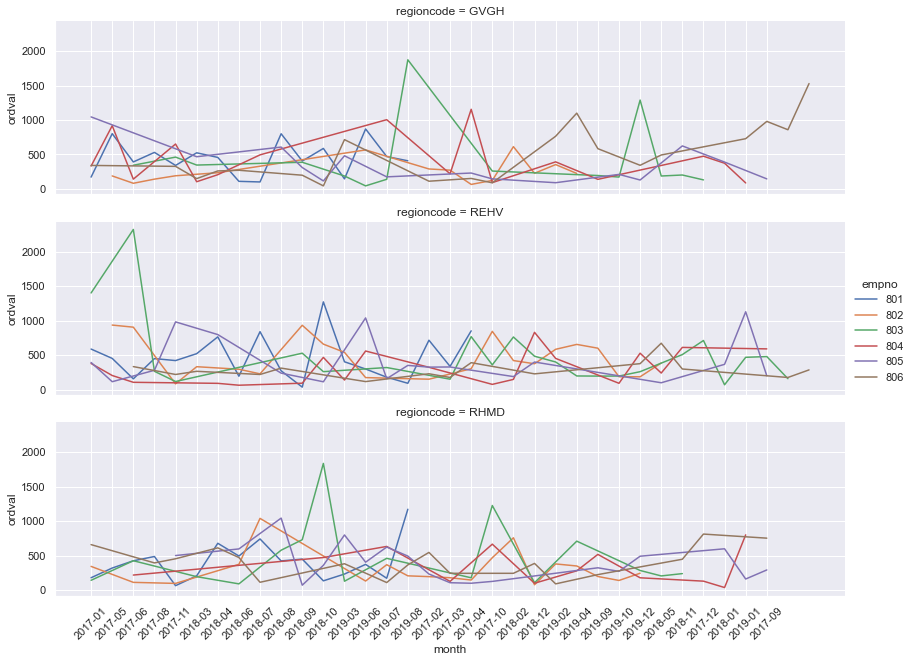

In [ ]:
g = (orders
 .assign(month=lambda x: x.orderdate.dt.to_period('M').astype(str))
 .groupby(['empno', 'regioncode', 'month'], as_index=False)
 .ordval
 .sum()
 .pipe((sns.FacetGrid, 'data'), row='regioncode', hue='empno', height=3, aspect=4)
)
g.map(sns.lineplot, 'month', 'ordval')
g.add_legend()
plt.xticks(rotation=45);